In [14]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [253]:
def side_by_side(*imgs):
    fig, axs = plt.subplots(1, len(imgs), figsize=(30, 15))

    for img, ax in zip(imgs, axs.ravel()):
        if img.shape[-1] == 3:
            img = img[..., ::-1]
            
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(img, cmap='gray')

In [269]:
def find_qr(img,kernel_d, kernel_e, threshold):
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  edges = cv.Canny(gray,100,200)

  img_dilate = cv.morphologyEx(edges, cv.MORPH_DILATE, kernel_d)
  img_erode = cv.morphologyEx(img_dilate, cv.MORPH_ERODE, kernel_e)

  n_comp, mask, stats, centroids = cv.connectedComponentsWithStats(img_erode)

  good_stats = [[]]
  for x, y, w, h, area in stats[1:]:
    cnt = (np.sum(img_erode[x:x+w, y:y+h] == 0) / (w*h)) 
    if cnt > threshold:
      good_stats = np.append(good_stats, [x,y,w,h,area])
  good_stats = np.reshape(good_stats, (-1, 5)).astype('int32')

  good_stats = good_stats[good_stats[:, 4].argsort()[::-1]]


  x, y, w, h, area = good_stats[0]
  result = img.copy()
  cv.rectangle(result, (x, y), (x + w, y + h), (255, 0, 0), 3)
  img_c = img.copy()
  for x, y, w, h, area in stats[1:]:
    cv.rectangle(img_c, (x, y), (x + w, y + h), (255, 0, 0), 3)

  side_by_side(img_erode, img_c, result)

  # return result




In [13]:
!wget https://www.qr-code-generator.com/wp-content/themes/qr/new_structure/assets/media/images/qr_codes_on/gallery/bottles-cans/v2/bottle-05.jpg

--2023-03-10 10:56:01--  https://www.qr-code-generator.com/wp-content/themes/qr/new_structure/assets/media/images/qr_codes_on/gallery/bottles-cans/v2/bottle-05.jpg
Resolving www.qr-code-generator.com (www.qr-code-generator.com)... 13.35.116.25, 13.35.116.61, 13.35.116.55, ...
Connecting to www.qr-code-generator.com (www.qr-code-generator.com)|13.35.116.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90828 (89K) [image/jpeg]
Saving to: ‘bottle-05.jpg.1’

bottle-05.jpg.1     100%[===================>]  88.70K  --.-KB/s    in 0.03s   

2023-03-10 10:56:01 (2.77 MB/s) - ‘bottle-05.jpg.1’ saved [90828/90828]



In [270]:
img = cv.imread('bottle-05.jpg')

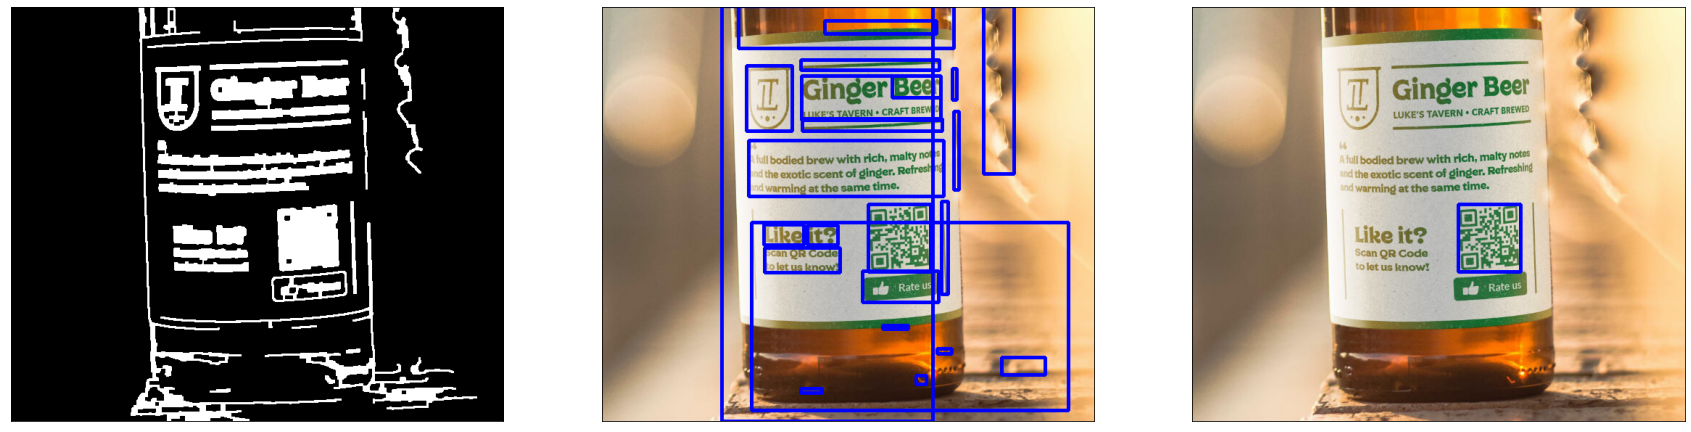

In [283]:
kernel_d = np.ones((7, 7))
kernel_e = np.ones((5, 5))
threshold = 0.9
find_qr(img,kernel_d, kernel_e, threshold)


In [249]:
!wget https://imageio.forbes.com/specials-images/imageserve/605b45ebcbca1c2183c667dd/Customer-scanning-QR-code-to-view-food-menu-online/960x0.jpg?format=jpg&width=960

--2023-03-10 12:09:13--  https://imageio.forbes.com/specials-images/imageserve/605b45ebcbca1c2183c667dd/Customer-scanning-QR-code-to-view-food-menu-online/960x0.jpg?format=jpg
Resolving imageio.forbes.com (imageio.forbes.com)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to imageio.forbes.com (imageio.forbes.com)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51050 (50K) [image/jpeg]
Saving to: ‘960x0.jpg?format=jpg.1’

960x0.jpg?format=jp 100%[===================>]  49.85K  --.-KB/s    in 0.01s   

2023-03-10 12:09:13 (3.92 MB/s) - ‘960x0.jpg?format=jpg.1’ saved [51050/51050]



In [260]:
img2 = cv.imread('960x0.jpg?format=jpg')

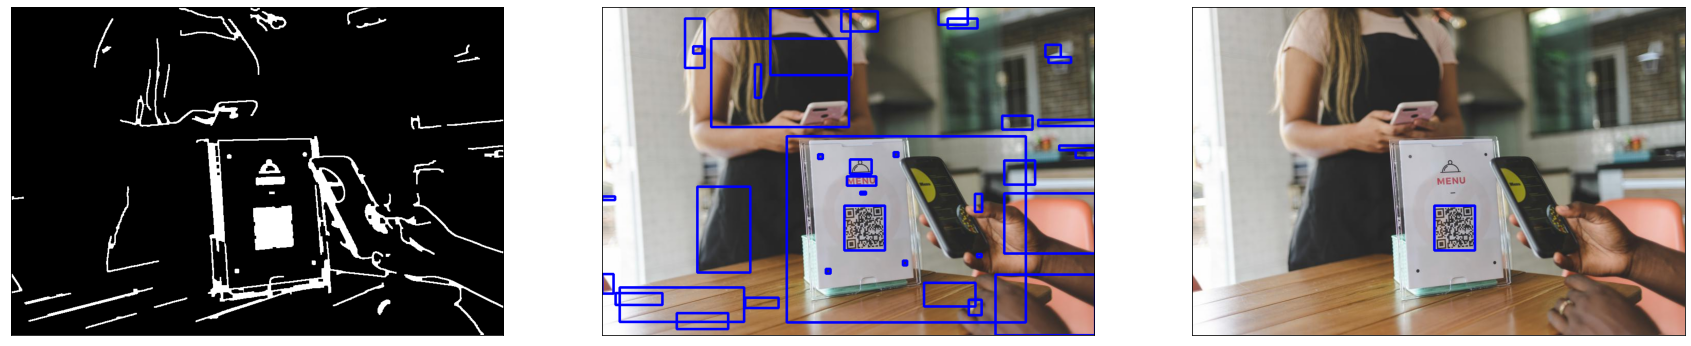

In [291]:
threshold = 0.8
kernel_d = np.ones((7, 7))
kernel_e = np.ones((5, 5))
find_qr(img2,kernel_d, kernel_e, threshold)

In [262]:
!wget https://media.qrtiger.com/blog/2021/09/social-media_800.jpeg
img3 = cv.imread('social-media_800.jpeg')

--2023-03-10 12:11:16--  https://media.qrtiger.com/blog/2021/09/social-media_800.jpeg
Resolving media.qrtiger.com (media.qrtiger.com)... 205.185.216.42, 205.185.216.10
Connecting to media.qrtiger.com (media.qrtiger.com)|205.185.216.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75161 (73K) [image/jpeg]
Saving to: ‘social-media_800.jpeg’

social-media_800.jp 100%[===================>]  73.40K  --.-KB/s    in 0.04s   

2023-03-10 12:11:16 (1.61 MB/s) - ‘social-media_800.jpeg’ saved [75161/75161]



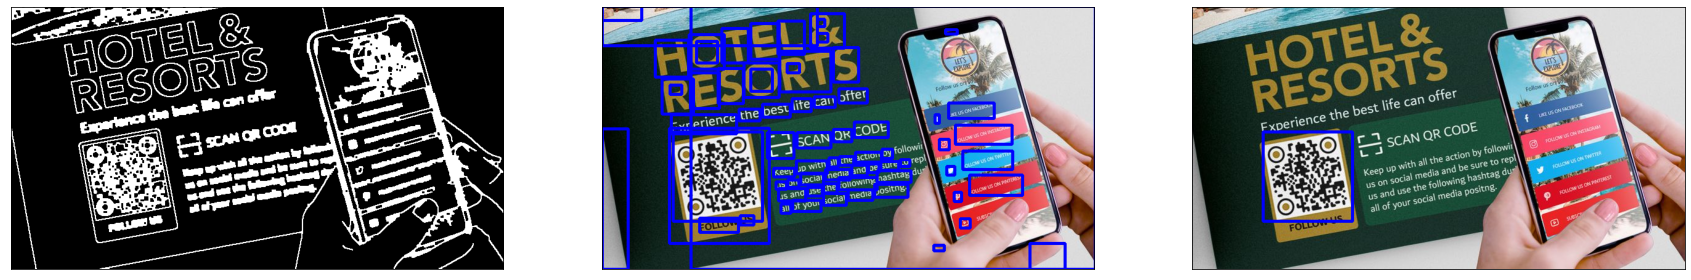

In [290]:
kernel_d = np.ones((4, 4))
kernel_e = np.ones((3, 3))
threshold = 0.7
find_qr(img3, kernel_d, kernel_e, threshold)

In [278]:
!wget https://s11.stc.yc.kpcdn.net/share/i/12/12241647/de-1200x675.jpg

--2023-03-10 12:17:18--  https://s11.stc.yc.kpcdn.net/share/i/12/12241647/de-1200x675.jpg
Resolving s11.stc.yc.kpcdn.net (s11.stc.yc.kpcdn.net)... 5.101.71.73, 2a13:1ec0:1000::1073
Connecting to s11.stc.yc.kpcdn.net (s11.stc.yc.kpcdn.net)|5.101.71.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171345 (167K) [image/jpeg]
Saving to: ‘de-1200x675.jpg’

de-1200x675.jpg     100%[===================>] 167.33K  --.-KB/s    in 0.05s   

2023-03-10 12:17:18 (3.58 MB/s) - ‘de-1200x675.jpg’ saved [171345/171345]



In [279]:
img4 = cv.imread('de-1200x675.jpg')

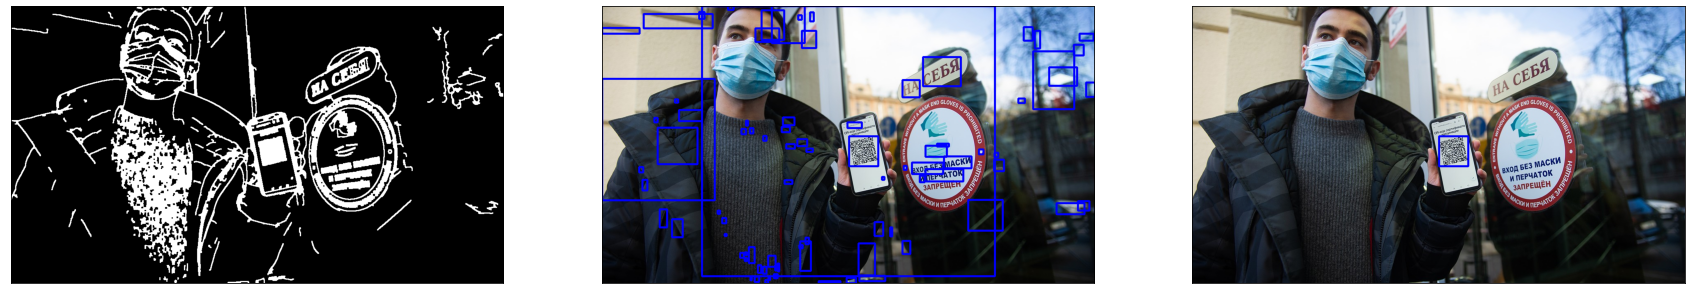

In [294]:
kernel_d = np.ones((5, 5))
kernel_e = np.ones((3, 3))
threshold = 0.8
find_qr(img4, kernel_d, kernel_e, threshold)